In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import netket as nk

/home/cwpark/acband-laughlin-instability/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


∣NK⟩ Tip: With many Markov Chains (e.g GPUs), n_discard_per_chain>5 is often inefficient.

In [2]:
from src.qm_utils.lattice.lattice import Lattice2D
from src.qm_utils.lattice.brillouin_zone import BrillouinZone2D
from src.netket_compat import get_sector_constraints

In [3]:
sqrt3 = np.sqrt(3)
e1 = np.array([1, 0])
e2 = np.array([0, 1])
a_M = 1.0
m = 3
lB = ((sqrt3 / (4 * m * np.pi)) ** 0.5) * a_M
a1 = a_M * e2
a2 = a_M * ((-sqrt3 / 2) * e1 + (1 / 2) * e2)
lattice = Lattice2D(np.stack([a1, a2]))
b = (4 * np.pi) / (a_M * sqrt3)
b1, b2 = lattice.reciprocal_lattice_vectors
b3 = -(b1 + b2)

# N = 27 grid
t1 = (1 / 9) * (b1 - b2)
t2 = (1 / 9) * (b1 - b3)

sample_lattice_27 = Lattice2D(np.stack([t1, t2]))
bz_27 = BrillouinZone2D(lattice, sample_lattice_27)
N_s_27 = bz_27.n_samples

# N = 28 grid
p1 = b1 + t2 - t1
normb1 = np.linalg.norm(b1)
normp1 = np.linalg.norm(p1)
distb1p1 = np.linalg.norm(b1 - p1)
scale = normb1 / normp1
rot = -np.arccos((normb1 ** 2 + normp1 ** 2 - distb1p1 ** 2) / (2 * normb1 * normp1))
sample_lattice_28 = sample_lattice_27.transformed(scale=scale, rot=rot)

bz_28 = BrillouinZone2D(lattice, sample_lattice_28)
N_s_28 = bz_28.n_samples

Plotting K_func2 with sigma=0.1


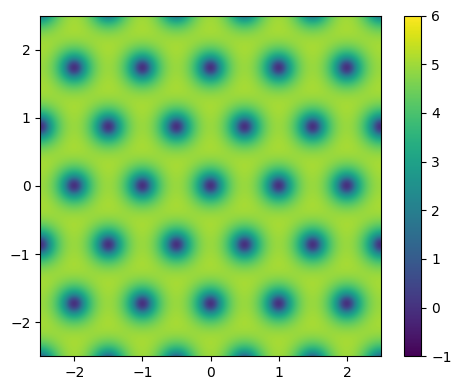

Plotting K_func2 with sigma=0.2


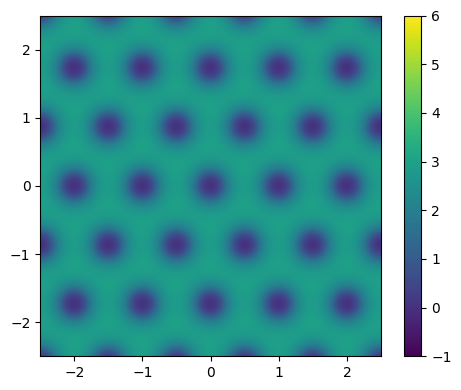

Plotting K_func2 with sigma=0.3


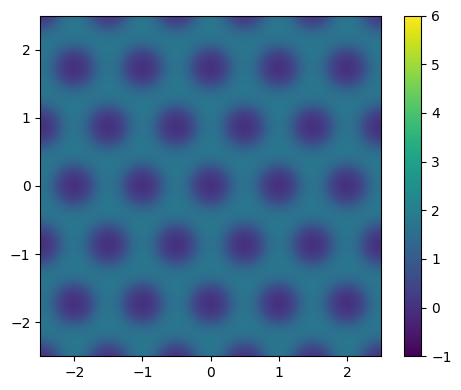

Plotting K_func2 with sigma=0.4


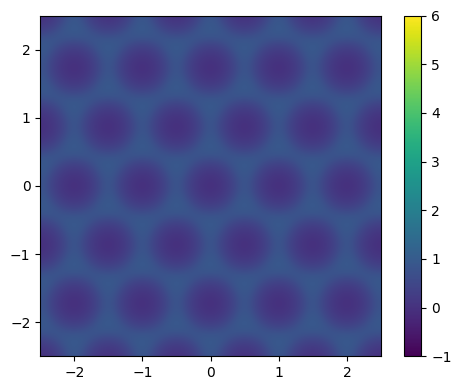

Plotting K_func2 with sigma=0.5


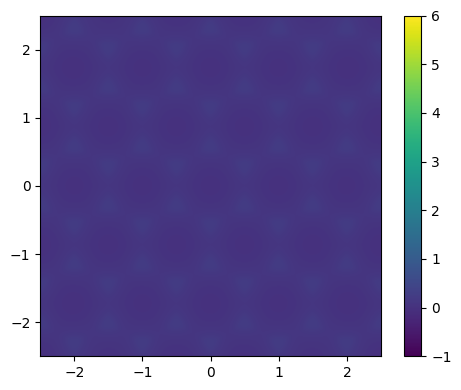

Plotting K_func2 with sigma=0.6


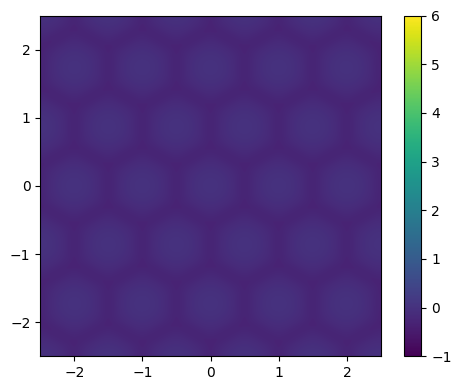

Plotting K_func2 with sigma=0.7


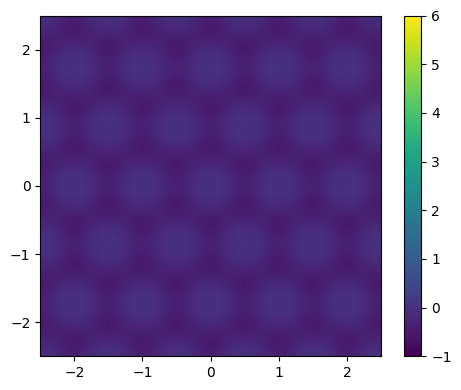

In [9]:
from src.acband import K_func1, K_func2

R = 5
xx = np.linspace(-R / 2, R / 2, 1000)
yy = np.linspace(-R / 2, R / 2, 1000)
X, Y = np.meshgrid(xx, yy)

points = np.stack([X, Y], axis=-1)

K_vals1 = K_func1(points, args=(1.6, b1, b2, b3))
K_vals2 = K_func2(points, args=(3, 0.25, R, a1, a2))

def _plot_K(K, name=None):
    extent = [xx.min(), xx.max(), yy.min(), yy.max()]
    mag = np.abs(K) if np.iscomplexobj(K) else K
    ph = np.angle(K) if np.iscomplexobj(K) else None

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(mag.T, extent=extent, origin='lower', cmap='viridis', aspect='auto', vmin=-1, vmax=6)
    plt.colorbar()
    if name is not None:
        plt.title(f'{name} magnitude')

    if ph is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(ph.T, extent=extent, origin='lower', cmap='twilight', aspect='auto')
        plt.colorbar(label='phase (rad)')
        if name is not None:
            plt.title(f'{name} phase')

    plt.tight_layout()
    plt.gca().set_aspect('equal')
    plt.show()

# _plot_K(K_vals1, 'K_func1')
# _plot_K(K_vals2, 'K_func2')

for sigma in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    K_vals = K_func2(points, args=(3, sigma, R, a1, a2))
    print(f'Plotting K_func2 with sigma={sigma}')
    _plot_K(K_vals)